In [1]:
from fytok.Tokamak import Tokamak
from spdm.view import View as sp_view


2023-09-28 14:51:10,458 [   fytok]     INFO: 
#######################################################################################################################

    ______      _____     _
   / ____/_  __|_   _|__ | | __
  / /_  / / / /  | |/ _ \| |/ /
 / __/ / /_/ /   | | (_) |   <
/_/    \__, /    |_|\___/|_|\_\
      /____/      
Copyright (c) 2021-present Zhi YU (Institute of Plasma Physics Chinese Academy of Sciences) 
URL         : https://gitee.com/openfusion/fytok_tutorial

version = 0.0.1-1-g248a38d-dirty
#######################################################################################################################

2023-09-28 14:51:10,476 [   fytok]     INFO: Mapping path [PosixPath('/home/salmon/workspace/fytok_tutorial/../fytok/python/fytok/_mapping')]
2023-09-28 14:51:10,627 [   fytok]     INFO: FyTok (0.2.0-153-gace0bd1-dirty) is compatible with the IMAS data dictionary 3.38.1-dirty.


In [2]:
tok = Tokamak("file+geqdsk:///home/salmon/workspace/fytok_tutorial/data/g900003.00230_ITER_15MA_eqdsk16HR.txt",
              device='ITER', shot='900003', time=2.3)



2023-09-28 14:51:12,212 [    spdm]     INFO: Load module spdm.plugins.data.plugin_xml


2023-09-28 14:51:14,100 [    spdm]     INFO: Load module fytok.plugins.equilibrium.eq_analyze
2023-09-28 14:51:14,104 [    spdm]     INFO: Load module spdm.plugins.data.plugin_geqdsk
2023-09-28 14:51:14,106 [    spdm]    DEBUG: /home/salmon/workspace/fytok_tutorial/../fytok/python/spdm/plugins/data/plugin_geqdsk.py:437:__init__: Open File mode=Mode.read  URITuple(protocol='file+geqdsk', authority='', path='/home/salmon/workspace/fytok_tutorial/data/g900003.00230_ITER_15MA_eqdsk16HR.txt', query={'shot': '900003', 'run': '', 'uid': '900003'}, fragment='') 
2023-09-28 14:51:14,187 [   fytok]     INFO: Load module eq_analyze 
2023-09-28 14:51:14,191 [    spdm]     INFO: Load module spdm.view.view_matplotlib
2023-09-28 14:51:14,226 [    spdm]     INFO: Load module spdm.mesh.mesh_rectangular
2023-09-28 14:51:14,715 [    spdm]    DEBUG: /home/salmon/workspace/fytok_tutorial/../fytok/SpDB/python/spdm/view/View.py:84:display: <?xml version="1.0" encoding="utf-8" standalone="no"?>
<!DOCTYPE svg 

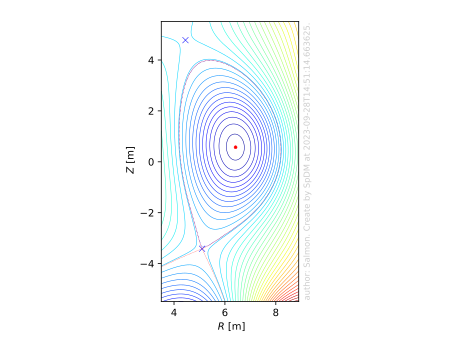

In [3]:
display(tok.equilibrium)

2023-09-28 14:51:24,535 [   fytok]     INFO: Load module Wall 
2023-09-28 14:51:24,804 [    spdm]    DEBUG: /home/salmon/workspace/fytok_tutorial/../fytok/SpDB/python/spdm/view/View.py:84:display: Figure(640x480)


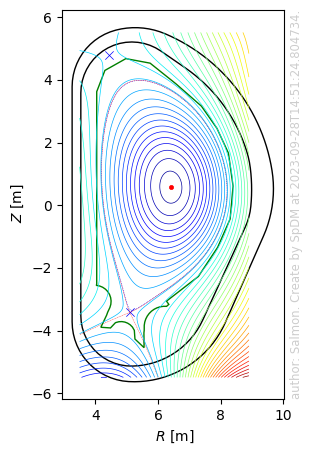

In [4]:
tok.refresh(0.5)
fig=sp_view.display([tok.equilibrium,tok.wall])

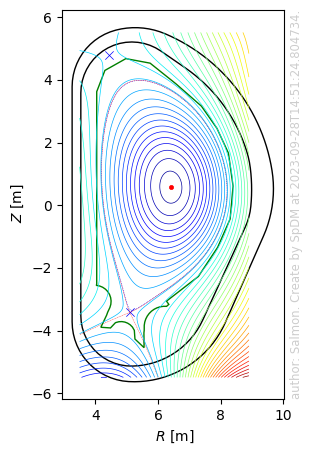

In [5]:
fig